<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Cosine_Similarities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cosine Similarities Between Newspaper Articles


In [1]:
# For extraction of articles from Newspapers, Here I'm downloading a library "Newspaper: Article scraping & curation"

!pip install newspaper3k

In [ ]:
# Importing necessary modules

import re
import nltk
import math
import numpy as np
import pandas as pd
from newspaper import Article
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [3]:
# Links for 10 different articles of newspaper the Times Of India

Links = ["https://timesofindia.indiatimes.com/home/education/news/iitians-use-deep-learning-techniques-to-digitally-restore-damaged-murals-of-ajanta-caves/articleshow/79022946.cms",
         "https://timesofindia.indiatimes.com/home/science/can-ai-help-better-predict-mouth-cancer-risk-uk-scientists-think-so/articleshow/79058120.cms",
         "https://timesofindia.indiatimes.com/business/india-business/infosys-launches-set-of-services-to-accelerate-cloud-journey/articleshow/77652367.cms",
         "https://timesofindia.indiatimes.com/home/education/news/why-cloud-computing-industries-are-growing-amid-covid-crisis/articleshow/77119785.cms",
         "https://timesofindia.indiatimes.com/business/international-business/bitcoin-hits-highest-in-13-months-as-2020-rally-gathers-steam/articleshow/77598278.cms",
         "https://timesofindia.indiatimes.com/city/thiruvananthapuram/vellar-crafts-village-beckons-visitors/articleshow/79072252.cms",
         "https://timesofindia.indiatimes.com/home/education/entrance-exams/jee-neet-2020-vmc-launches-rapid-success-courses-for-entrance-exam-preparations/articleshow/77365635.cms",
         "https://www.cricbuzz.com/cricket-news/114860/twitter-reactions-ipl-2020-cricket-uae-final-mi-dc-rohit-sharma-the-greatest-t20-team-of-all-time",
         "https://timesofindia.indiatimes.com/india/bihar-election-result-2020-highlights/articleshow/79140928.cms",
         "https://timesofindia.indiatimes.com/world/us/us-presidential-elections"]

In [4]:
N = len(Links)

In [5]:
# Extracting articles from their respective links

Articles = []
Titles = []
for link in Links:
  article = Article(link, language="en")
  article.download()                      #To download the article 
  article.parse()                         #To parse the article
  article.nlp()                           #To perform natural language processing ie..nlp 
  Articles.append(article.text)           #To extract text 
  Titles.append(article.title)            #To extract title 


In [6]:
for i in range(N):
  print("\n #\033[4m", Titles[i], ":\033[0m")
  print(Articles[i][:500])


 # IITians use deep learning techniques to digitally restore damaged murals of Ajanta caves :
At the recently-concluded Tech4Heritage hackathon, a team of deep learning enthusiasts from IIT Roorkee won the top prize. Utilising a dataset of reference paintings to develop their AI model, the team ‘Ancient AI’ was able to come up with restorative outcomes with the help of deep learning techniques for the damaged murals of the Ajanta Caves. Comprising of Parth Chhabra, Kushagra Babbar, Arjav Jain and Aryan Prasad — all of whom are BTech second-year mechanical engineering students, the team e

 # Can AI help better predict mouth cancer risk? UK scientists think so :
LONDON: Artificial intelligence (AI) may help doctors better predict the risk of patients developing oral cancer by ensuring accuracy, consistency and objectivity, according to researchers from the University of Sheffield in the UK.The researchers are examining the use of AI and machine learning - the study of computer algorith

In [7]:
# Function to convert test in lower case

def convert_lower_case(data):
    return np.char.lower(data)

In [8]:
# Function to remove stop words (words that are so commonly used that they carry very little useful information)

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text


In [9]:
# Function to remove punctuation marks

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    data = np.char.replace(data, "'", "")
    return data

In [10]:
# Function for lemmitization of data

def lemmatization(data):
    lemmatizer = WordNetLemmatizer() 
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(w)
    return new_text

In [11]:
# Function for preprocessing

def preprocess(data):
    data = convert_lower_case(data)       # convert data to lower case
    data = remove_punctuation(data)       # remove punctuations 
    data = remove_stop_words(data)        # remove stop words
    data = lemmatization(data)            # lemmatization of data
    return data

In [12]:
PrePro_Articles = []

for i in range(N):

  prepro_article = preprocess(Articles[i])

  PrePro_Articles.append(prepro_article)

In [13]:
for i in range(N):
  print("\n #\033[4m", Titles[i], ":\033[0m")
  print(PrePro_Articles[i][:500])


 # IITians use deep learning techniques to digitally restore damaged murals of Ajanta caves :
 recently concluded tech4heritage hackathon team deep learning enthusiast iit roorkee top prize utilising dataset reference painting develop ai model team ancient ai able come restorative outcome help deep learning technique damaged mural ajanta cave comprising parth chhabra kushagra babbar arjav jain aryan prasad btech second year mechanical engineering student team embarked upon hackathon fruitfully utilise lockdown day idea undertaking challenge came september covid case india peak common int

 # Can AI help better predict mouth cancer risk? UK scientists think so :
 london artificial intelligence ai may help doctor better predict risk patient developing oral cancer ensuring accuracy consistency objectivity according researcher university sheffield uk researcher examining use ai machine learning study computer algorithm improve automatically experience assist pathologist improve early dete

In [14]:
# Pairing up Articles so that cosine similarity can be determined between article pairs

article_ids = ["Article_" + str(i) for i in range(N)]

# create a dictionary
article_dict = dict(zip(article_ids, Titles))

# get all the book ids in a list
ids = list(article_dict.keys())

# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))
        
print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
pairs[:10]

There are a total of 45 pairs
Displaying first 10 pairs: 


[('Article_0', 'Article_1'),
 ('Article_0', 'Article_2'),
 ('Article_0', 'Article_3'),
 ('Article_0', 'Article_4'),
 ('Article_0', 'Article_5'),
 ('Article_0', 'Article_6'),
 ('Article_0', 'Article_7'),
 ('Article_0', 'Article_8'),
 ('Article_0', 'Article_9'),
 ('Article_1', 'Article_2')]

In [15]:
# Vectorization of Data along with tf-idf weights

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.0, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
feature_matrix = vectorizer.fit_transform(PrePro_Articles).astype(float)

In [17]:
# Function for computing Cosine Similarities 

def compute_cosine_similarity(pair):
    
    # extract the indexes from the pair
    article1, article2 = pair
    
    # split on _ and get index
    article1_index = int(article1.split("_")[1])
    article2_index = int(article2.split("_")[1])
    
    # get the feature matrix of the document
    article1_fm = feature_matrix.toarray()[article1_index]
    article2_fm = feature_matrix.toarray()[article2_index]
    
    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(article1_fm, article2_fm)
    
    return manual_cosine_similarity

In [18]:
cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

In [19]:
df = pd.DataFrame({'pair': pairs, 'similarity': cosine_similarity})
df.head()

,pair,similarity
0,"(Article_0, Article_1)",0.079431
1,"(Article_0, Article_2)",0.035488
2,"(Article_0, Article_3)",0.111881
3,"(Article_0, Article_4)",0.036690
4,"(Article_0, Article_5)",0.092751


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


### Code snippet for plotting Heat Map

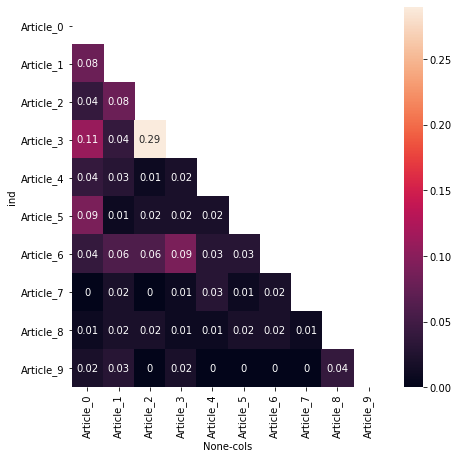

In [21]:
# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(N), 'cols': range(N), 'vals': pd.Series(np.zeros(N))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['article1'] = list1
df_temp['article2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# extract index so that you can construct pairs
df_temp['article1'] = df_temp['article1'].apply(lambda x: int(x.split('_')[-1]))
df_temp['article2'] = df_temp['article2'].apply(lambda x: int(x.split('_')[-1]))

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.article1, df_temp.article2, round(df_temp.similarity, 2)))

# display(df_temp.head())

# to get lower diagnol, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity

mask = np.zeros_like(df_hm)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_hm, mask = mask, annot = True, xticklabels = ids, yticklabels = ids)

In [22]:
# display articles which are most similar and least similar

df.loc[[df.similarity.values.argmax(), df.similarity.values.argmin()]]


,pair,similarity
17,"(Article_2, Article_3)",0.293807
21,"(Article_2, Article_7)",0.000000


In [23]:
print("Most similar articles are: ")
print(article_dict['Article_2'])
print(" and ")
print(article_dict['Article_3'])


Most similar articles are: 
Infosys Cobalt: Infosys launches set of services to accelerate cloud journey
 and 
Why Cloud Computing industries are growing amid Covid crisis


In [24]:
print("Most dissimilar articles are: ")
print(article_dict['Article_2'])
print(" and ")
print(article_dict['Article_7'])

Most dissimilar articles are: 
Infosys Cobalt: Infosys launches set of services to accelerate cloud journey
 and 
'The greatest T20 team of all time'
